<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
df = pd.read_csv("data.csv")
print(df.shape)
df.head()


(100, 3)


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
df = pd.read_csv("data.csv")
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Task 3: Visualize the Data
---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<Axes: >

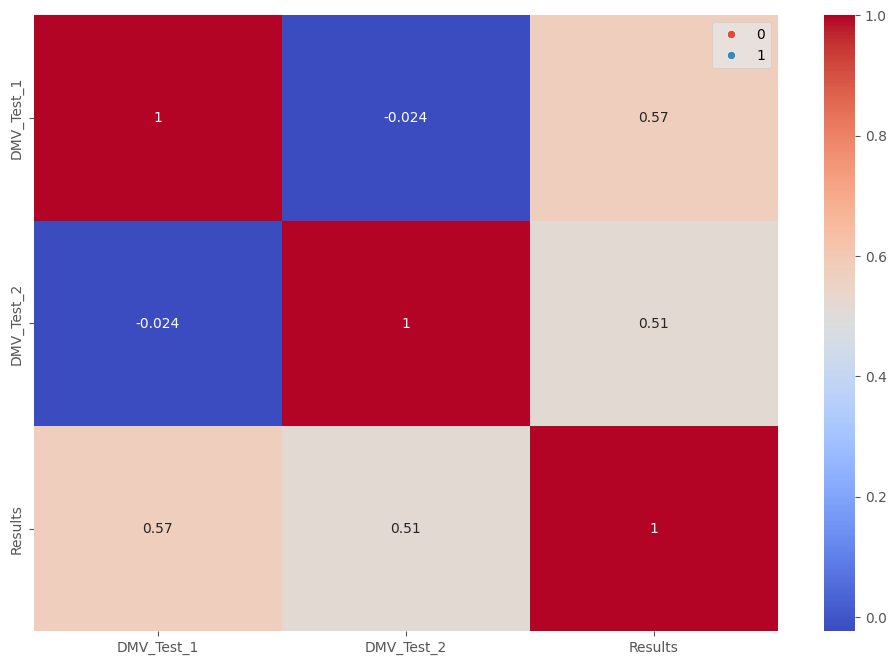

In [24]:
df.info()
df.describe()
sns.scatterplot(x="DMV_Test_1", y="DMV_Test_2", hue="Results", data=df)

sns.histplot(df["DMV_Test_1"], bins=20, kde=True)
sns.histplot(df["DMV_Test_2"], bins=20, kde=True)

sns.boxplot(x="Results", y="DMV_Test_1", data=df)
sns.boxplot(x="Results", y="DMV_Test_2", data=df)

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")



### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


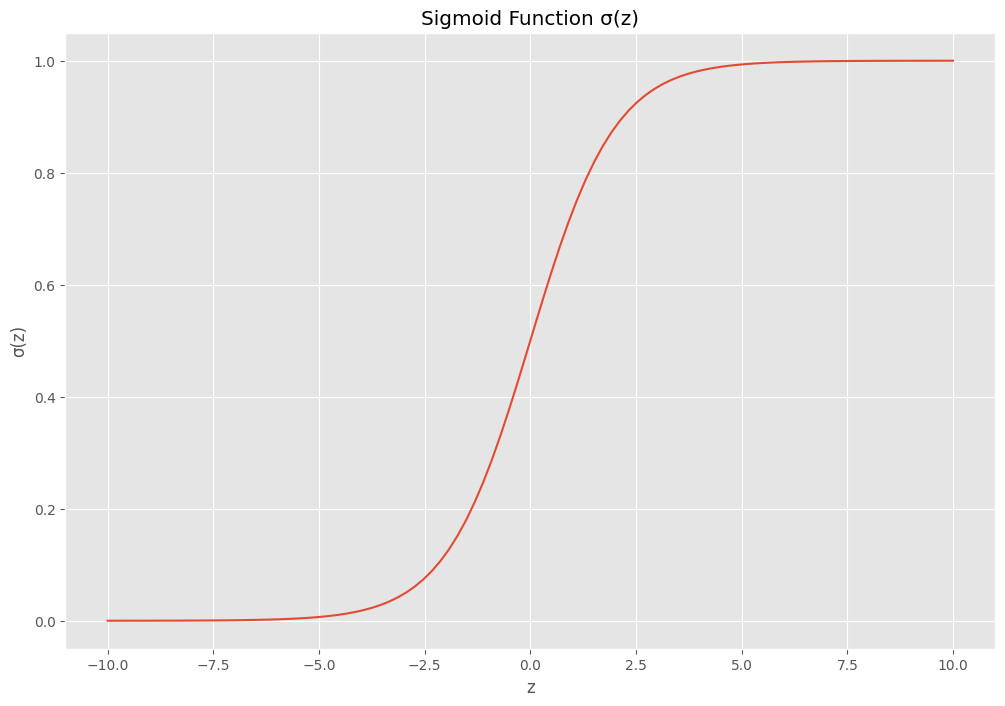

In [ ]:
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function σ(z)")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -(1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    return cost

def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient
X = df[["DMV_Test_1", "DMV_Test_2"]].values
y = df["Results"].values

X = np.c_[np.ones(X.shape[0]), X]
theta = np.zeros(X.shape[1])

cost = compute_cost(theta, X, y)
grad = compute_gradient(theta, X, y)

print("Initial Cost:", cost)
print("Initial Gradient:", grad)


Initial Cost: 0.6931471805599453
Initial Gradient: [ -0.1        -12.00921659 -11.26284221]


### Task 6: Cost and Gradient at Initialization
---

In [31]:
def compute_cost(theta, X, y):
    m = len(y)
    h = 1 / (1 + np.exp(-(X @ theta)))
    cost = -(1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    return cost
cost = compute_cost(theta, X, y)
print("Cost at initialization:", cost)

Cost at initialization: 0.6931471805599453


In [26]:
def compute_gradient(theta, X, y):
    m = len(y)
    h = 1 / (1 + np.exp(-(X @ theta)))
    gradient = (1/m) * (X.T @ (h - y))
    return gradient
    grad = compute_gradient(theta, X, y)
print("Gradient at initialization:", grad)

Gradient at initialization: [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [34]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    epsilon = 1e-9
    for i in range(num_iters):
        h = 1 / (1 + np.exp(-(X @ theta)))
        gradient = (1/m) * (X.T @ (h - y))
        theta = theta - alpha * gradient
        h = np.clip(h, epsilon, 1 - epsilon)
        cost = -(1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
        cost_history.append(cost)

    return theta, cost_history


Optimized Theta: [-0.76754116  0.35868899 -0.11012487]
Final Cost: 8.289306346691337


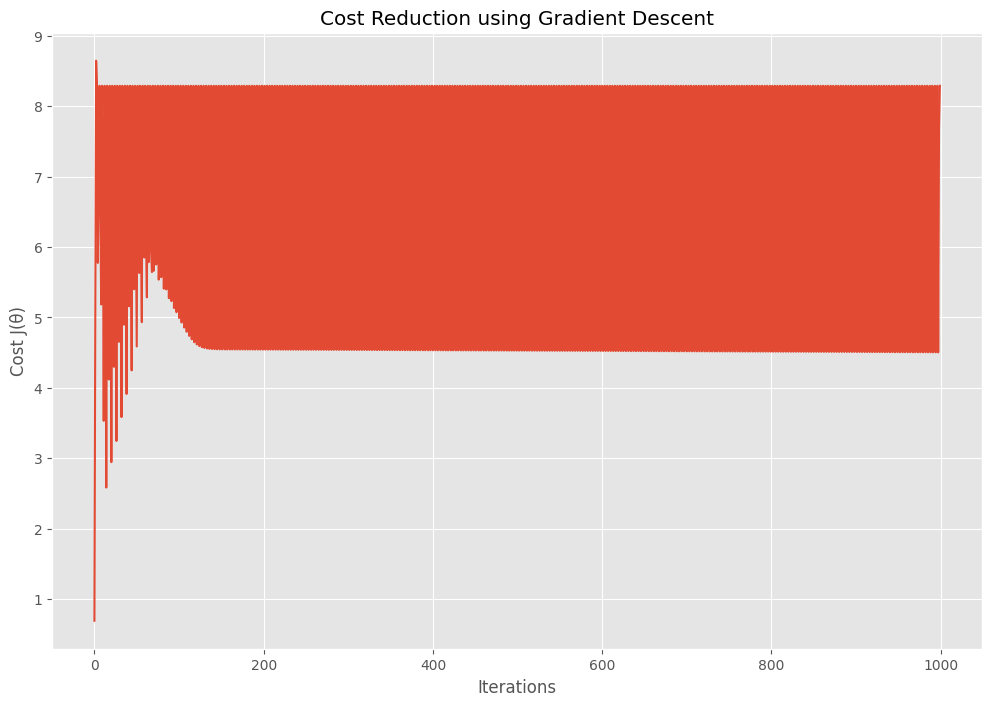

In [35]:
alpha = 0.01
iterations = 1000
theta = np.zeros(X.shape[1])

theta_opt, cost_history = gradient_descent(X, y, theta, alpha, iterations)

print("Optimized Theta:", theta_opt)
print("Final Cost:", cost_history[-1])

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Cost Reduction using Gradient Descent")
plt.show()


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

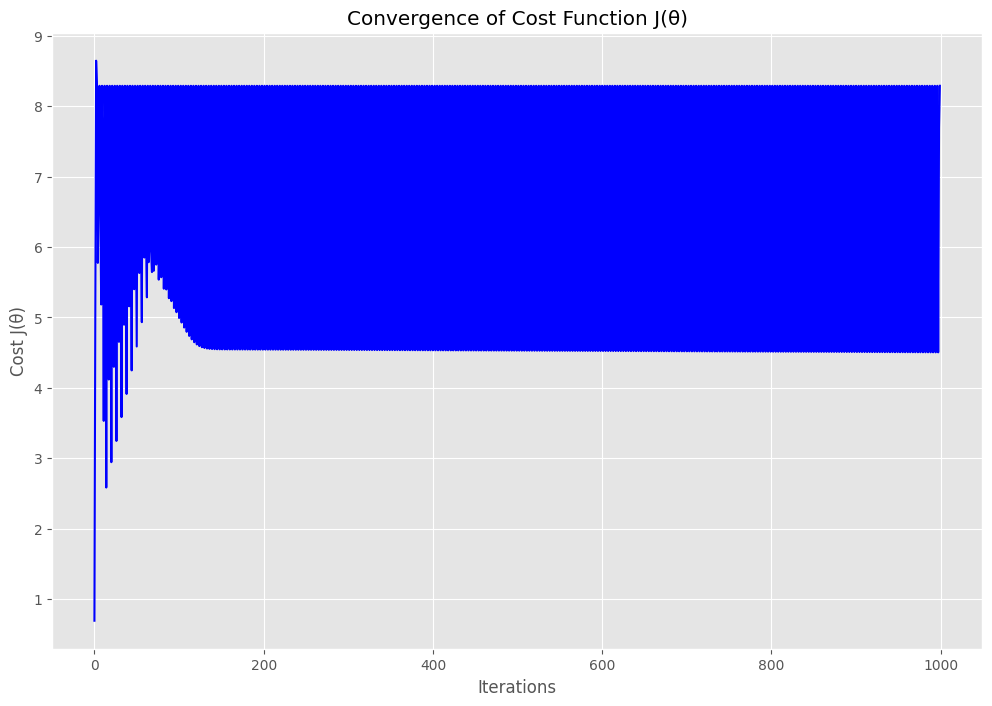

In [36]:
plt.plot(range(len(cost_history)), cost_history, color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Cost Function J(θ)")
plt.show()



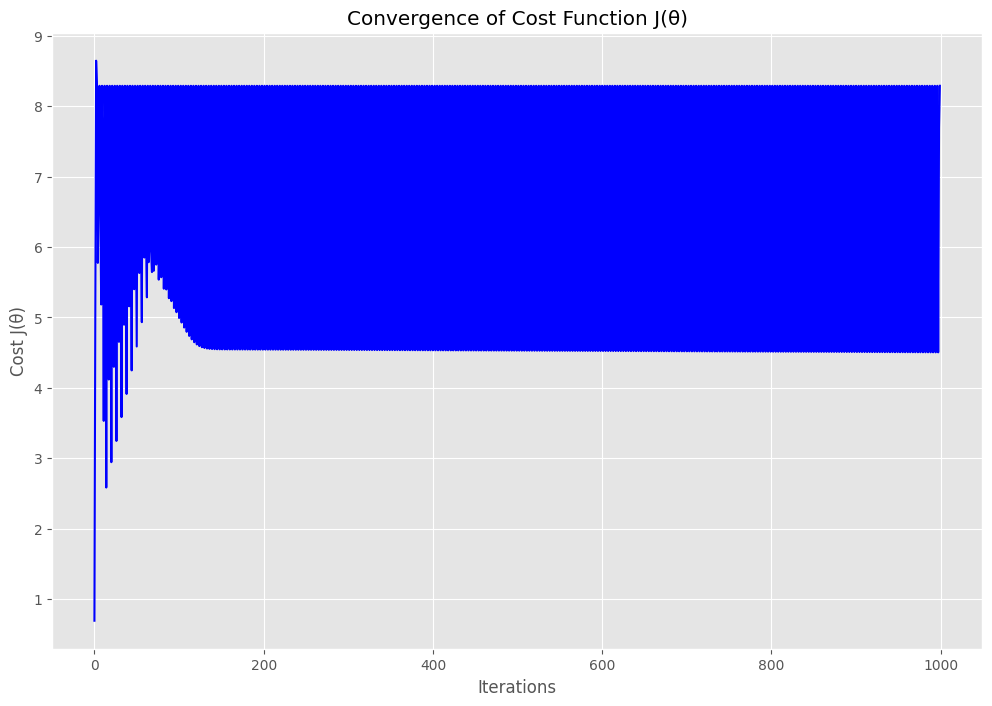

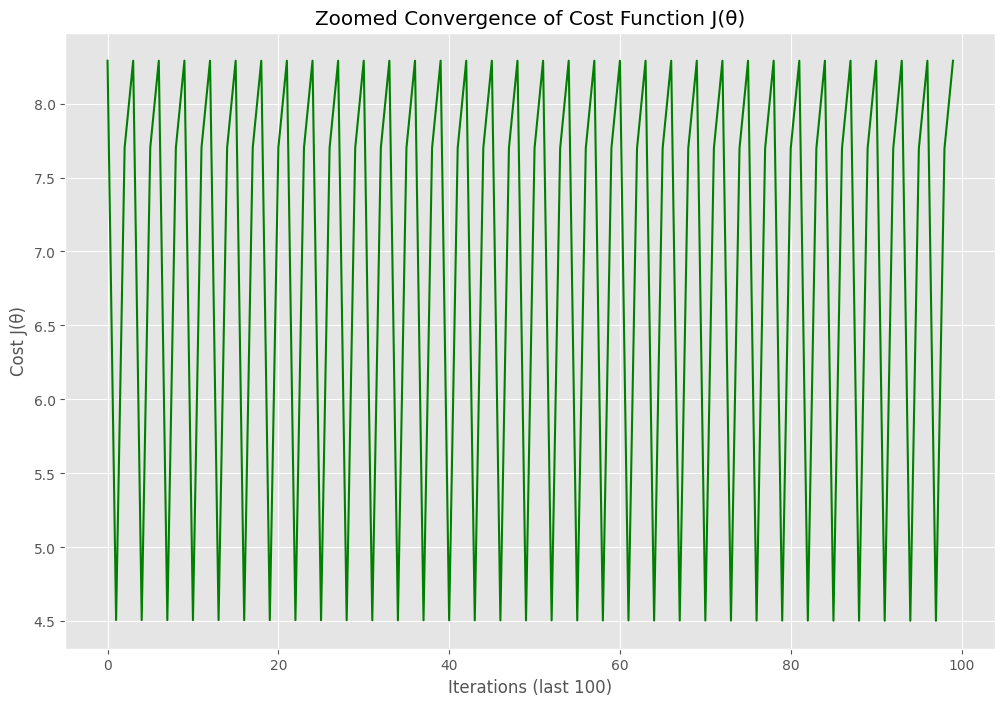

In [38]:
plt.plot(range(len(cost_history)), cost_history, color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Cost Function J(θ)")
plt.show()

plt.plot(range(len(cost_history[-100:])), cost_history[-100:], color="green")
plt.xlabel("Iterations (last 100)")
plt.ylabel("Cost J(θ)")
plt.title("Zoomed Convergence of Cost Function J(θ)")
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

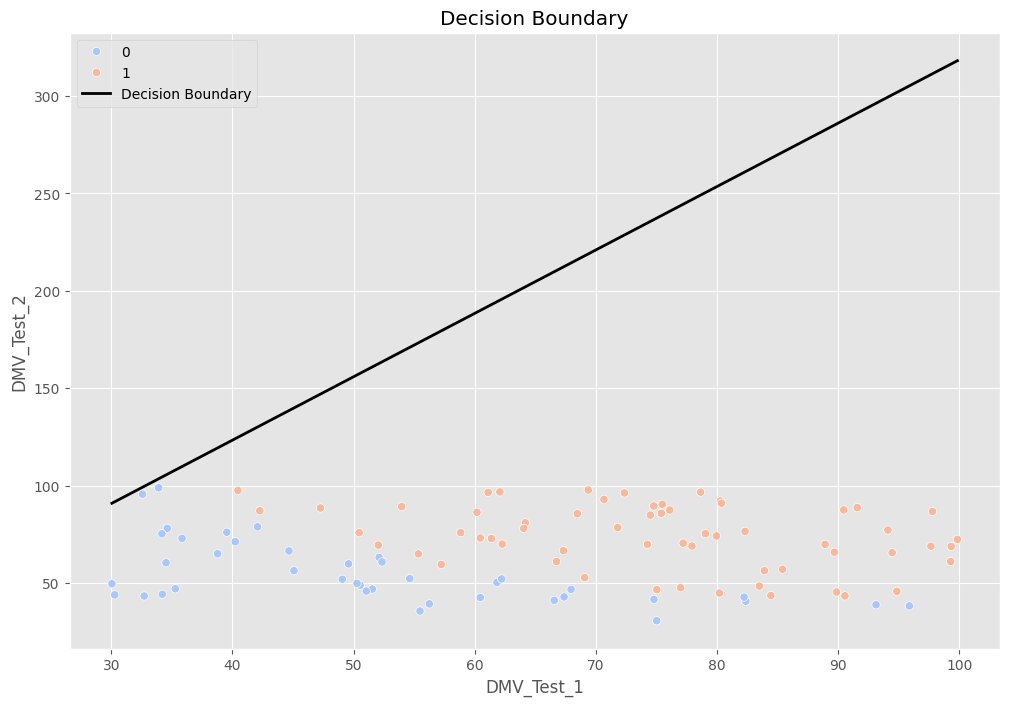

In [39]:
sns.scatterplot(
    x="DMV_Test_1",
    y="DMV_Test_2",
    hue="Results",
    data=df,
    palette="coolwarm"
)

x_values = np.linspace(df["DMV_Test_1"].min(), df["DMV_Test_1"].max(), 200)
y_values = -(theta_opt[0] + theta_opt[1]*x_values) / theta_opt[2]

plt.plot(x_values, y_values, color="black", linewidth=2, label="Decision Boundary")
plt.legend()
plt.title("Decision Boundary")
plt.show()


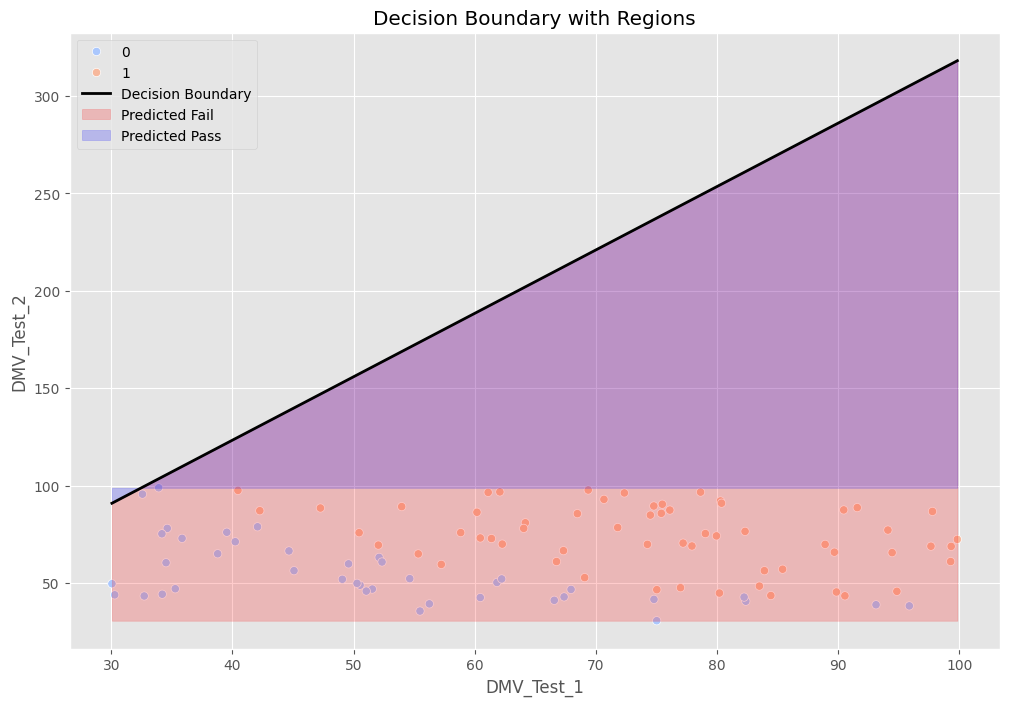

In [40]:
sns.scatterplot(
    x="DMV_Test_1",
    y="DMV_Test_2",
    hue="Results",
    data=df,
    palette="coolwarm"
)

x_values = np.linspace(df["DMV_Test_1"].min(), df["DMV_Test_1"].max(), 200)
y_values = -(theta_opt[0] + theta_opt[1]*x_values) / theta_opt[2]

plt.plot(x_values, y_values, color="black", linewidth=2, label="Decision Boundary")

plt.fill_between(x_values, y_values, df["DMV_Test_2"].min(), color="red", alpha=0.2, label="Predicted Fail")
plt.fill_between(x_values, y_values, df["DMV_Test_2"].max(), color="blue", alpha=0.2, label="Predicted Pass")

plt.legend()
plt.title("Decision Boundary with Regions")
plt.show()


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [41]:
def predict(X, theta):
    probs = 1 / (1 + np.exp(-(X @ theta)))
    return (probs >= 0.5).astype(int)


In [42]:
y_pred = predict(X, theta_opt)
print("Predictions:", y_pred[:10])


Predictions: [1 1 1 1 1 1 1 1 1 1]


In [43]:
accuracy = np.mean(y_pred == y) * 100
print("Model Accuracy: {:.2f}%".format(accuracy))


Model Accuracy: 60.00%
